Krishna Khandelwal

Assignmnet-2


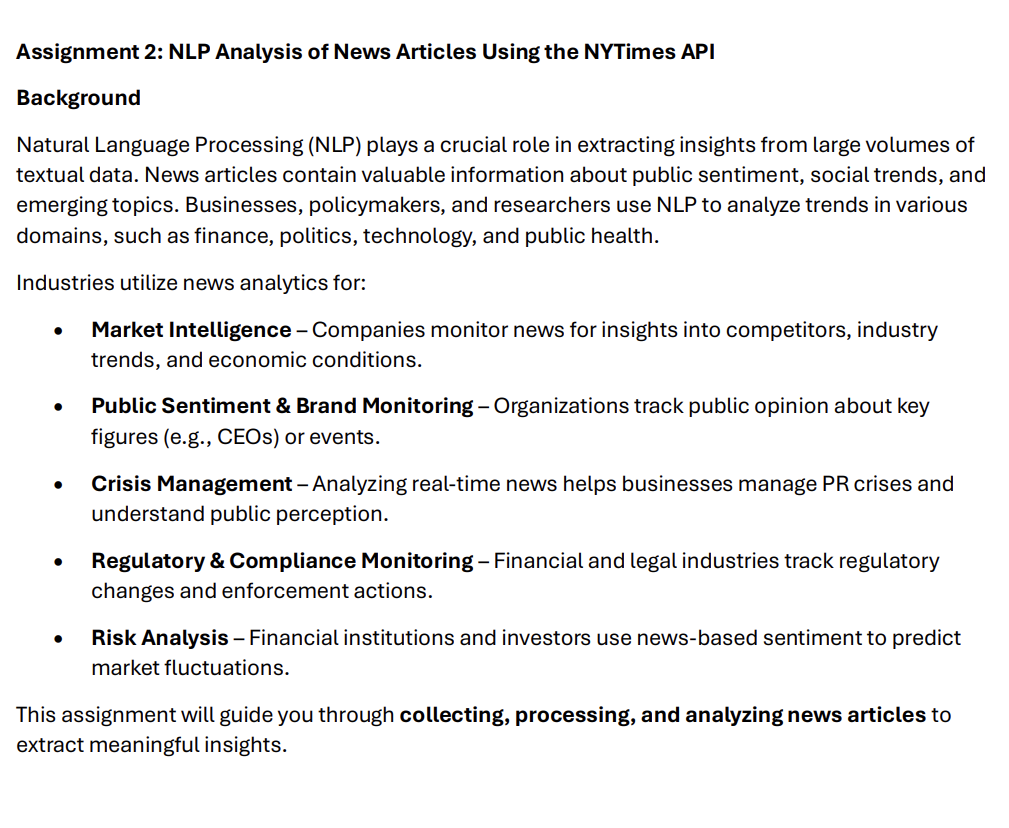

# Step 1: Build a Dataset Using the NYTimes API


In [ ]:
import requests as req
import time
import pandas as pd
from tqdm import tqdm

# User inputs
TOPIC = input("Enter the topic: ").strip()
START_DATE = input("Enter start date (YYYYMMDD): ").strip()
END_DATE = input("Enter end date (YYYYMMDD): ").strip()
TOTAL_ARTICLES = int(input("Enter the total number of articles to fetch: ").strip())

# API Key (Replace with your valid key)
API_KEY = "TFI8GCddEI7CWkkZJuAiCz5ONeVbLvev"

# Base URL for NY Times API
BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

# Storage for articles
articles = []
pages = TOTAL_ARTICLES // 10 + (1 if TOTAL_ARTICLES % 10 > 0 else 0)

# Fetching articles
for page in tqdm(range(pages), desc="Fetching Articles"):
    url = (
        f"{BASE_URL}?q={TOPIC}&begin_date={START_DATE}&end_date={END_DATE}"
        f"&api-key={API_KEY}&page={page}"
    )

    response = req.get(url).json()

    if "response" in response and "docs" in response["response"]:
        docs = response["response"]["docs"]

        for doc in docs:
            articles.append({
                "Title": doc["headline"]["main"] if "headline" in doc else None,
                "Publication Date": doc.get("pub_date", None),
                "Author": doc.get("byline", {}).get("original", None),
                "Location": doc.get("section_name", None),
                "Summary": doc.get("abstract", None),
                "Full Article Content": doc.get("lead_paragraph", None),
                "URL": doc.get("web_url", None),
            })

        if len(articles) >= TOTAL_ARTICLES:
            break

    time.sleep(6)

# Convert to DataFrame
df = pd.DataFrame(articles)

# Save to CSV
csv_filename = "nytimes_articles.csv"
df.to_csv(csv_filename, index=False, encoding="utf-8")

print(f"\nDataset saved as {csv_filename}")


Enter the topic: Chatgpt
Enter start date (YYYYMMDD): 20150101
Enter end date (YYYYMMDD): 20250225
Enter the total number of articles to fetch: 100


Fetching Articles:  90%|█████████ | 9/10 [01:09<00:07,  7.67s/it]


Dataset saved as nytimes_articles.csv


*Collected news articles from the New York Times Article Search API based on chatgpt topic and date range provided by the user. It will retrieves key details like the title, author, and summary, then saves the results into a CSV file for further analysis.*

In [ ]:
len(articles)

100

*Checked for length of the articles which i tried to fetch*

All necessary libraries

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Install necessary libraries
!pip install spacy
!python -m spacy download en_core_web_sm

# Import required libraries
import spacy
import re
import string
from nltk.corpus import stopwords
import nltk

# Install VADER for sentiment analysis
!pip install vaderSentiment

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Install wordcloud if not already installed
!pip install wordcloud

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Install necessary libraries if not already installed
!pip install gensim

# Import necessary libraries
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')


nltk.download('punkt_tab')




# Step 2: Save Data as a CSV File

In [ ]:
import pandas as pd

# Load the saved dataset
df = pd.read_csv("nytimes_articles.csv")

# Display the first few rows
print(df.head(10))

# Check for missing values
print(df.isnull().sum())


                                               Title  \
0  She Fell in Love With ChatGPT. Like, Actual Lo...   
1         ChatGPT Is Restored After Hourslong Outage   
2                        She Is in Love With ChatGPT   
3  How Helpful Is Operator, OpenAI’s New A.I. Agent?   
4  They Invested Billions. Then the A.I. Script G...   
5       First Impressions of DeepSeek’s A.I. Chatbot   
6  OpenAI Unveils A.I. Agent That Can Use Website...   
7  OpenAI Courts Trump With Vision for ‘A.I. in A...   
8       At the Intersection of A.I. and Spirituality   
9                          The 2024 Good Tech Awards   

           Publication Date  \
0  2025-02-25T11:00:10+0000   
1  2025-01-23T13:02:14+0000   
2  2025-01-15T14:00:09+0000   
3  2025-02-01T10:01:31+0000   
4  2025-01-29T10:03:18+0000   
5  2025-01-27T23:33:09+0000   
6  2025-01-23T18:00:06+0000   
7  2025-01-13T11:00:10+0000   
8  2025-01-03T10:00:23+0000   
9  2024-12-30T17:00:02+0000   

                                         

*After collecting the articles, I saved them into a CSV file called nytimes_articles.csv for easy access and further analysis. In this step, I loaded the dataset back into a pandas DataFrame, previewed the first few rows to check the data structure, and verified if there were any missing values. This helped ensure the dataset was clean and ready for the next steps.*

# Step 3: Load the Saved Dataset


In [ ]:
# Performed basic inspection
df_info = df.info()  # Get dataset info
missing_values = df.isnull().sum()  # Count missing values per column
duplicate_rows = df.duplicated().sum()  # Count duplicate rows



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 100 non-null    object
 1   Publication Date      100 non-null    object
 2   Author                99 non-null     object
 3   Location              99 non-null     object
 4   Summary               100 non-null    object
 5   Full Article Content  100 non-null    object
 6   URL                   100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [ ]:
# Display first few rows of the dataset
print(df.head())

# Display missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Display duplicate row count
print("\nDuplicate rows in dataset:", df.duplicated().sum())

# Display dataset information
print("\nDataset Info:")
df.info()


                                               Title  \
0  She Fell in Love With ChatGPT. Like, Actual Lo...   
1         ChatGPT Is Restored After Hourslong Outage   
2                        She Is in Love With ChatGPT   
3  How Helpful Is Operator, OpenAI’s New A.I. Agent?   
4  They Invested Billions. Then the A.I. Script G...   

           Publication Date  \
0  2025-02-25T11:00:10+0000   
1  2025-01-23T13:02:14+0000   
2  2025-01-15T14:00:09+0000   
3  2025-02-01T10:01:31+0000   
4  2025-01-29T10:03:18+0000   

                                              Author      Location  \
0  By Natalie Kitroeff, Kashmir Hill, Nina Feldma...      Podcasts   
1                                   By Victor Mather  Business Day   
2                                    By Kashmir Hill    Technology   
3                                     By Kevin Roose    Technology   
4                                   By Erin Griffith    Technology   

                                             Summary  \

*I inspected the dataset by displaying the first few rows and checking for missing values and duplicates. Then, I used df.info() to review the dataset's structure, ensuring it was clean and ready for analysis.*



# Step 4: Exploratory Data Analysis (EDA)

Feature Engineering

In [ ]:
# Ensure Full Article Content column is not empty
df["Full Article Content"] = df["Full Article Content"].fillna("")

# Part 1: Word Count per Article
df["Word Count"] = df["Full Article Content"].apply(lambda x: len(x.split()))

# Part 2: Sentence Count per Article
df["Sentence Count"] = df["Full Article Content"].apply(lambda x: len(x.split('.')))

# Part 3: Character Count per Article
df["Character Count"] = df["Full Article Content"].apply(lambda x: len(x))

# Part 4: Average Word Length per Article
df["Avg Word Length"] = df["Full Article Content"].apply(
    lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0
)


*In this step, I engineered new features to better understand the articles. I calculated the word count, sentence count, character count, and average word length for each article. These features helped summarize the length and complexity of the articles, providing useful insights for further analysis.*

# Some Visualizations

Article frequency over time

In [ ]:
import plotly.express as px

# Convert 'Publication Date' to datetime (if not already converted)
df["Publication Date"] = pd.to_datetime(df["Publication Date"], errors="coerce")

# Extract year-month for time-based analysis
df["Year-Month"] = df["Publication Date"].dt.to_period("M").astype(str)

# Create a DataFrame for plotting
article_counts = df["Year-Month"].value_counts().sort_index().reset_index()
article_counts.columns = ["Year-Month", "Number of Articles"]

# Create bar chart
fig = px.bar(
    article_counts,
    x="Year-Month",
    y="Number of Articles",
    title="Article Frequency Over Time",
    labels={"Year-Month": "Year-Month", "Number of Articles": "Number of Articles"},
    color_discrete_sequence=["orange"]
)

fig.update_layout(
    xaxis_tickangle=-45,
    bargap=0.2,
    plot_bgcolor='white'
)

fig.show()


<ipython-input-12-559f11ffcad1>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Year-Month"] = df["Publication Date"].dt.to_period("M").astype(str)


*I analyzed how many articles were published each month by grouping them by year and month. Then, I visualized this data using a bar chart in Plotly, which shows the frequency of articles over time. This helps identify trends in publication volume and highlights periods of high or low activity.*



Distribution of article lengths

In [ ]:
# Created histogram
fig = px.histogram(
    df,
    x="Word Count",
    nbins=30,
    title="Distribution of Article Lengths",
    labels={"Word Count": "Word Count", "count": "Number of Articles"},
    color_discrete_sequence=["orange"]
)

fig.update_layout(
    bargap=0.1,
    plot_bgcolor='white'
)

fig.show()


*I created a histogram to visualize the distribution of article lengths based on word count. This helped me understand how long most articles are and identify whether the dataset is balanced between shorter and longer pieces.*


Authors with the most articles

In [ ]:
import plotly.graph_objects as go

# Get the top 10 authors by article count
top_authors = df["Author"].value_counts().head(10).reset_index()
top_authors.columns = ["Author", "Number of Articles"]

# Create vertical bar chart
fig = go.Figure(go.Bar(
    x=top_authors["Author"],
    y=top_authors["Number of Articles"],
    text=top_authors["Number of Articles"],
    textposition='outside',
    marker=dict(
        color='rgba(26, 118, 255, 0.7)',
        line=dict(color='rgba(26, 118, 255, 1.0)', width=1.5)
    )
))

# Update layout
fig.update_layout(
    title="Top Authors with Most Articles",
    xaxis_title="Author",
    yaxis_title="Number of Articles",
    xaxis_tickangle=-15,  # Slight tilt, easier to read
    xaxis=dict(
        tickfont=dict(size=12),
        tickmode='array',
        tickvals=list(range(len(top_authors))),
        ticktext=[name[:30] + '...' if len(name) > 30 else name for name in top_authors["Author"]]
    ),
    yaxis=dict(tickfont=dict(size=12)),
    title_font=dict(size=20),
    plot_bgcolor='white',
    width=900,
    height=600
)

# Show the plot
fig.show()


*I created a vertical bar chart to display the top 10 authors who published the most articles in the dataset. This visualization highlights the key contributors and gives a quick overview of who wrote the most on the selected topics. I also adjusted the layout and label formatting to make the chart more readable.*

# Step 5: NLP Preprocessing Pipeline

In [ ]:
# Install necessary libraries
!pip install spacy
!python -m spacy download en_core_web_sm

# Import required libraries
import spacy
import re
import string
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*In this step, I set up the NLP preprocessing pipeline by installing and importing key libraries like SpaCy and NLTK. I downloaded the required stopwords and loaded SpaCy's language model, which I used later for tokenization and text cleaning.*


In [ ]:
# Define text preprocessing function
def clean_text(text):
    # Remove special characters, digits, and punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert text to lowercase

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    return " ".join(filtered_words)



In [ ]:
# Apply text cleaning to 'Full Article Content' column
df["Cleaned Text"] = df["Full Article Content"].apply(clean_text)

# Tokenization using SpaCy
df["Tokens"] = df["Cleaned Text"].apply(lambda text: [token.text for token in nlp(text)])

# Lemmatization using SpaCy
df["Lemmatized Text"] = df["Cleaned Text"].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))



*In this step, I cleaned the text data by removing special characters, digits, punctuation, and stopwords. Then, I used SpaCy to tokenize the text and applied lemmatization to reduce words to their root form. This process made the text clean and structured, preparing it for further analysis like sentiment detection and topic modeling.*


# Step 6: Convert Text Data Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words="english")  # Top 500 features

# Apply TF-IDF transformation
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Cleaned Text"])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine with original dataset
df_tfidf = pd.concat([df, tfidf_df], axis=1)

# Save the final dataset
df_tfidf.to_csv("nytimes_articles_tfidf.csv", index=False)

# Display the transformed dataset
print("TF-IDF transformation completed! Here is a preview:")
print(df_tfidf.head())


TF-IDF transformation completed! Here is a preview:
                                               Title  \
0  She Fell in Love With ChatGPT. Like, Actual Lo...   
1         ChatGPT Is Restored After Hourslong Outage   
2                        She Is in Love With ChatGPT   
3  How Helpful Is Operator, OpenAI’s New A.I. Agent?   
4  They Invested Billions. Then the A.I. Script G...   

           Publication Date  \
0 2025-02-25 11:00:10+00:00   
1 2025-01-23 13:02:14+00:00   
2 2025-01-15 14:00:09+00:00   
3 2025-02-01 10:01:31+00:00   
4 2025-01-29 10:03:18+00:00   

                                              Author      Location  \
0  By Natalie Kitroeff, Kashmir Hill, Nina Feldma...      Podcasts   
1                                   By Victor Mather  Business Day   
2                                    By Kashmir Hill    Technology   
3                                     By Kevin Roose    Technology   
4                                   By Erin Griffith    Technology   

   

*In this step, I converted the cleaned text into numerical features using the TF-IDF vectorizer. I limited it to the top 500 important terms to focus on the most relevant words. This transformation made the text data ready for machine learning models and further analysis.*

# Step 7: NLP Application 1 – Sentiment Analysis


In [ ]:
# Install VADER for sentiment analysis
!pip install vaderSentiment

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.0 MB/s eta 0:00:00


In [ ]:
# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))  # Ensure text is string
    return sentiment["compound"]  # Use compound score for overall sentiment

# Apply sentiment analysis
df["Sentiment Score"] = df["Cleaned Text"].apply(get_sentiment)

# Categorize sentiment (Positive, Neutral, Negative)
df["Sentiment Category"] = df["Sentiment Score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

# Save sentiment analysis results
df.to_csv("nytimes_articles_sentiment.csv", index=False)

# Plot sentiment trends over time
df["Publication Date"] = pd.to_datetime(df["Publication Date"], errors="coerce")
df["Year-Month"] = df["Publication Date"].dt.to_period("M").astype(str)

# Aggregate sentiment scores per month
sentiment_trend = df.groupby("Year-Month")["Sentiment Score"].mean()



<ipython-input-20-5026b2f8f2c3>:17: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



*I used VADER sentiment analysis to evaluate the tone of each article, assigning a sentiment score and category (Positive, Negative, or Neutral). Then, I analyzed how sentiment trends changed over time by aggregating the results monthly. This helped identify shifts in media sentiment on the selected topics.*

In [ ]:
sentiment_trend_df = sentiment_trend.reset_index()
sentiment_trend_df.columns = ["Year-Month", "Average Sentiment Score"]

# Convert 'Year-Month' Period to string for Plotly compatibility
sentiment_trend_df["Year-Month"] = sentiment_trend_df["Year-Month"].astype(str)

# Create line chart using Plotly
fig = px.line(
    sentiment_trend_df,
    x="Year-Month",
    y="Average Sentiment Score",
    title="Sentiment Trends Over Time",
    markers=True
)

# Add gridlines and customize layout
fig.update_layout(
    xaxis_title="Year-Month",
    yaxis_title="Average Sentiment Score",
    plot_bgcolor='white',
    width=900,
    height=500,
    xaxis=dict(
        showgrid=True,        # Enable X-axis gridlines
        gridcolor='lightgrey',
        tickangle=-45
    ),
    yaxis=dict(
        showgrid=True,        # Enable Y-axis gridlines
        gridcolor='lightgrey'
    )
)

# Show the plot
fig.show()


*Visualized the sentiment trends over time using a Plotly line chart. The graph shows how the average sentiment score of articles changed month by month, with added gridlines for clarity and easier interpretation.*

In [ ]:
# Display final dataset preview
print("Sentiment analysis completed! Here is a preview:")
print(df[["Title", "Sentiment Score", "Sentiment Category"]].head())


Sentiment analysis completed! Here is a preview:
                                               Title  Sentiment Score  \
0  She Fell in Love With ChatGPT. Like, Actual Lo...          -0.3400   
1         ChatGPT Is Restored After Hourslong Outage           0.0000   
2                        She Is in Love With ChatGPT           0.6369   
3  How Helpful Is Operator, OpenAI’s New A.I. Agent?           0.0000   
4  They Invested Billions. Then the A.I. Script G...           0.4767   

  Sentiment Category  
0           Negative  
1            Neutral  
2           Positive  
3            Neutral  
4           Positive  


# Step 8: Word Cloud Analysis

In [ ]:
# Install wordcloud if not already installed
!pip install wordcloud

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the sentiment analysis dataset
csv_filepath = "nytimes_articles_sentiment.csv"  # Ensure correct file path
df = pd.read_csv(csv_filepath)

# Separate positive and negative articles
positive_text = " ".join(df[df["Sentiment Category"] == "Positive"]["Cleaned Text"].dropna())
negative_text = " ".join(df[df["Sentiment Category"] == "Negative"]["Cleaned Text"].dropna())


*After completing sentiment analysis, I reviewed the results by displaying a preview of article titles along with their sentiment scores and categories. Then, I prepared for word cloud analysis by separating positive and negative texts, which will help visualize the most common words used in articles with different sentiments.*


Positive Reviews

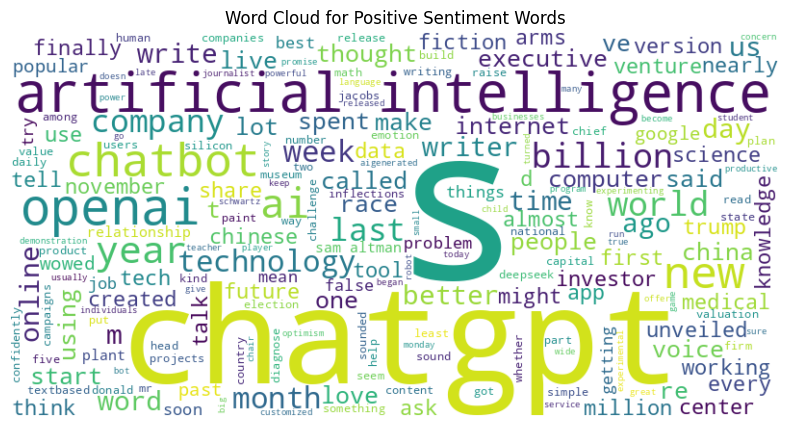

In [ ]:
# Generate Word Cloud for Positive Words
plt.figure(figsize=(10, 5))
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment Words")
plt.show()



Negative` Reviews

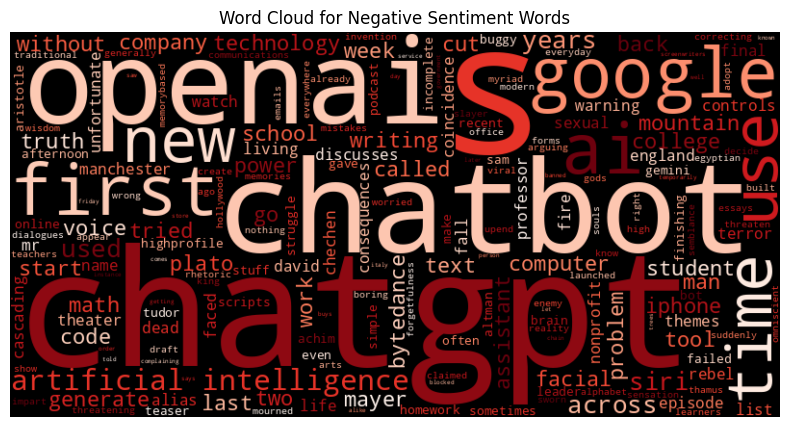

In [ ]:
# Generate Word Cloud for Negative Words
plt.figure(figsize=(10, 5))
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Negative Sentiment Words")
plt.show()


*   I generated two separate word clouds to visualize the most frequently used words in positive and negative sentiment articles.
*   For positive sentiment, the word cloud highlighted terms like ChatGPT, artificial intelligence, and technology, often associated with innovation and progress.
*   For negative sentiment, common terms included chatbot, openai, and google, often appearing in contexts expressing concern or criticism.
*  The word clouds helped quickly identify dominant themes and language patterns in articles with differing sentiments.





# Step 9: NLP Application 2 – Topic Modeling

In [ ]:
# Install necessary libraries if not already installed
!pip install gensim

# Import necessary libraries
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

# Ensure NLTK tokenization resources are available
nltk.download("punkt")

# Load the cleaned dataset
csv_filepath = "/content/nytimes_articles_sentiment.csv"



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('punkt_tab')

# Tokenize the cleaned text data
df["Tokenized Text"] = df["Cleaned Text"].apply(lambda x: word_tokenize(str(x)))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(df["Tokenized Text"])
corpus = [dictionary.doc2bow(text) for text in df["Tokenized Text"]]

# Train LDA model (adjust num_topics as needed)
num_topics = 5  # Define number of topics to extract
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)



I used the Gensim library to apply Latent Dirichlet Allocation (LDA) for topic modeling on the cleaned text data.
After tokenizing the articles using NLTK, I created a dictionary and corpus, which served as inputs for the LDA model.
The model was trained to identify the top 5 key topics across the articles, helping uncover the main themes present in the dataset.



In [ ]:
# Display the top words for each topic
topics = lda_model.print_topics(num_words=10)
print("\nExtracted Topics:")
for topic in topics:
    print(topic)

# Assign topics to articles
df["Dominant Topic"] = [max(lda_model[doc], key=lambda x: x[1])[0] if lda_model[doc] else None for doc in corpus]

# Analyze topic trends over time
df["Publication Date"] = pd.to_datetime(df["Publication Date"], errors="coerce")
df["Year-Month"] = df["Publication Date"].dt.to_period("M")

# Aggregate topic trends
topic_trends = df.groupby(["Year-Month", "Dominant Topic"]).size().unstack(fill_value=0)




Extracted Topics:
(0, '0.012*"chatbot" + 0.012*"chatgpt" + 0.010*"artificial" + 0.010*"openai" + 0.008*"intelligence" + 0.008*"world" + 0.008*"online" + 0.006*"november" + 0.006*"write" + 0.006*"words"')
(1, '0.018*"’" + 0.015*"s" + 0.012*"openai" + 0.011*"chatgpt" + 0.008*"chatbot" + 0.008*"would" + 0.008*"company" + 0.008*"billion" + 0.006*"ai" + 0.006*"intelligence"')
(2, '0.036*"’" + 0.022*"s" + 0.010*"—" + 0.010*"like" + 0.010*"ai" + 0.008*"“" + 0.008*"”" + 0.007*"chatgpt" + 0.007*"i" + 0.006*"openai"')
(3, '0.018*"openai" + 0.016*"chatgpt" + 0.014*"’" + 0.013*"intelligence" + 0.013*"artificial" + 0.012*"chatbot" + 0.009*"s" + 0.009*"”" + 0.009*"“" + 0.008*"new"')
(4, '0.020*"’" + 0.012*"chatgpt" + 0.011*"read" + 0.011*"artificial" + 0.011*"i" + 0.011*"intelligence" + 0.008*"beach" + 0.006*"new" + 0.006*"like" + 0.006*"”"')


<ipython-input-29-7ccb3929e74d>:12: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



*I displayed the top words for each topic generated by the LDA model to understand the main themes. Then, I assigned a dominant topic to each article and analyzed how these topics trended over time by grouping them monthly. This helped visualize shifts in focus across different periods.*

In [ ]:
# Reset index if necessary and convert Year-Month to string for Plotly
topic_trends_df = topic_trends.reset_index()
topic_trends_df["Year-Month"] = topic_trends_df["Year-Month"].astype(str)

# Melt the DataFrame to long format for Plotly
topic_trends_melted = topic_trends_df.melt(id_vars="Year-Month",
                                           var_name="Topic",
                                           value_name="Number of Articles")

# Create interactive line plot
fig = px.line(
    topic_trends_melted,
    x="Year-Month",
    y="Number of Articles",
    color="Topic",
    markers=True,
    title="Topic Trends Over Time"
)

# Customize layout with grids
fig.update_layout(
    xaxis_title="Year-Month",
    yaxis_title="Number of Articles",
    legend_title="Topics",
    width=950,
    height=600,
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,        # Enable grid lines for X-axis
        gridcolor='lightgrey',
        tickangle=-45
    ),
    yaxis=dict(
        showgrid=True,        # Enable grid lines for Y-axis
        gridcolor='lightgrey'
    )
)

# Show the plot
fig.show()


*I visualized how different topics trended over time by creating an interactive line chart using Plotly. The graph shows the number of articles for each topic per month, with customized grid lines for better readability. This helped track shifts in focus across topics throughout the analyzed period.*


In [ ]:
# Save topic modeling results
df.to_csv("nytimes_articles_topics.csv", index=False)

# Display preview of dataset with topics
print("\n Topic modeling completed! Preview of dataset with assigned topics:")
print(df[["Title", "Dominant Topic"]].head())



 Topic modeling completed! Preview of dataset with assigned topics:
                                               Title  Dominant Topic
0  She Fell in Love With ChatGPT. Like, Actual Lo...               4
1         ChatGPT Is Restored After Hourslong Outage               0
2                        She Is in Love With ChatGPT               2
3  How Helpful Is Operator, OpenAI’s New A.I. Agent?               1
4  They Invested Billions. Then the A.I. Script G...               4


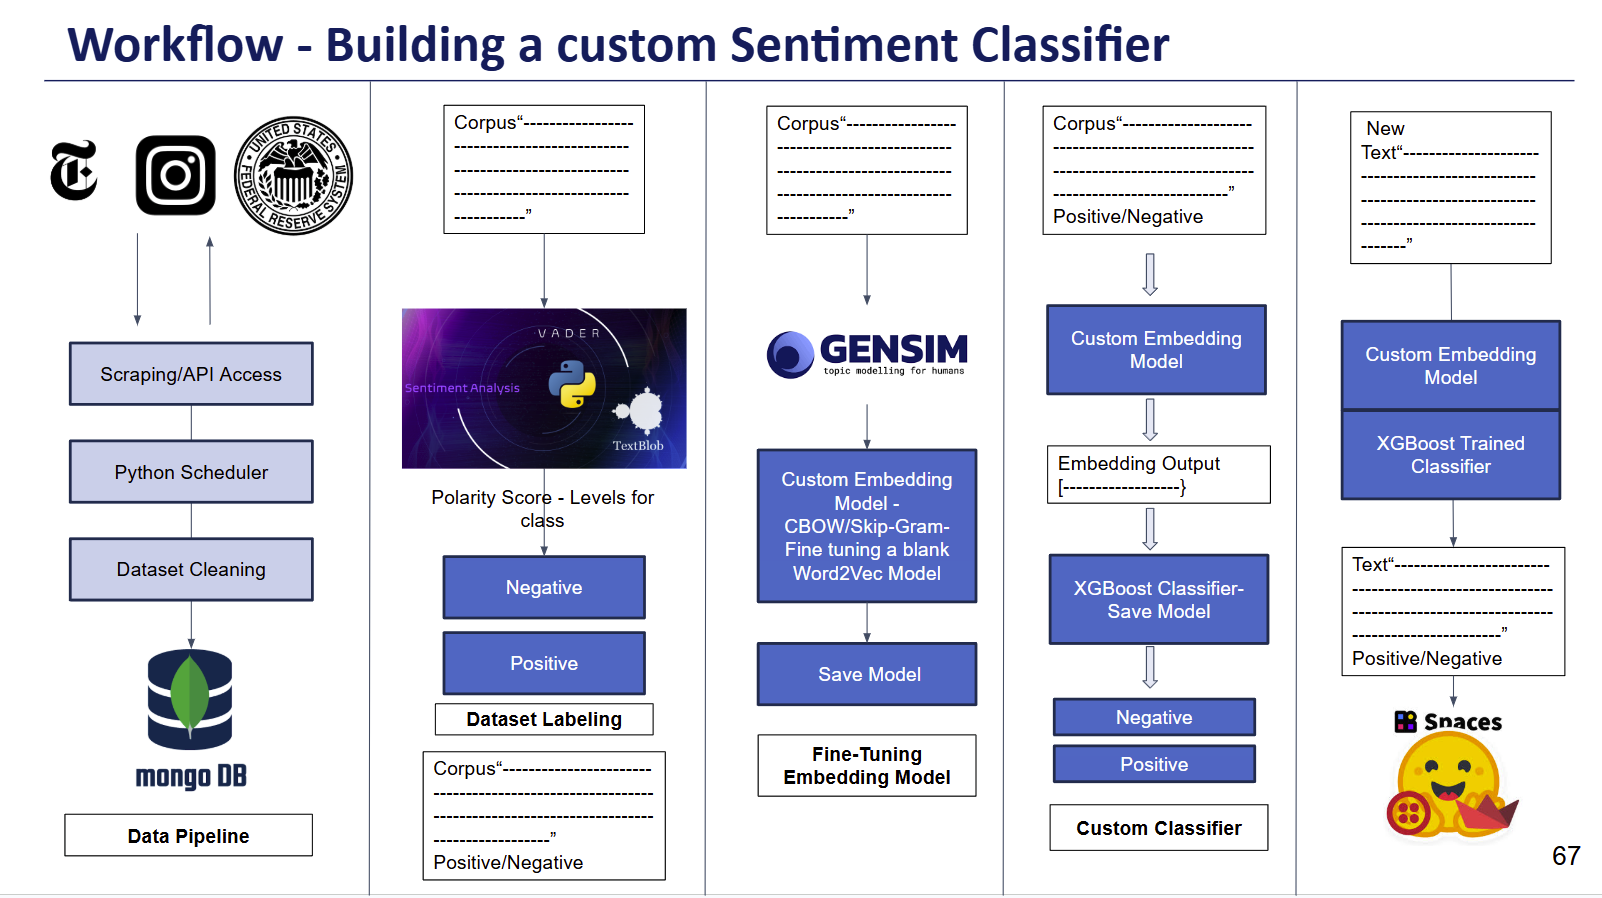